<a href="https://colab.research.google.com/github/HazelNarendra/Proyek-PSD/blob/main/filter%20and%20windows/Praktikum%203/Jobsheet%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install modul scikit-dsp-comm
!pip install scikit-dsp-comm

In [ ]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


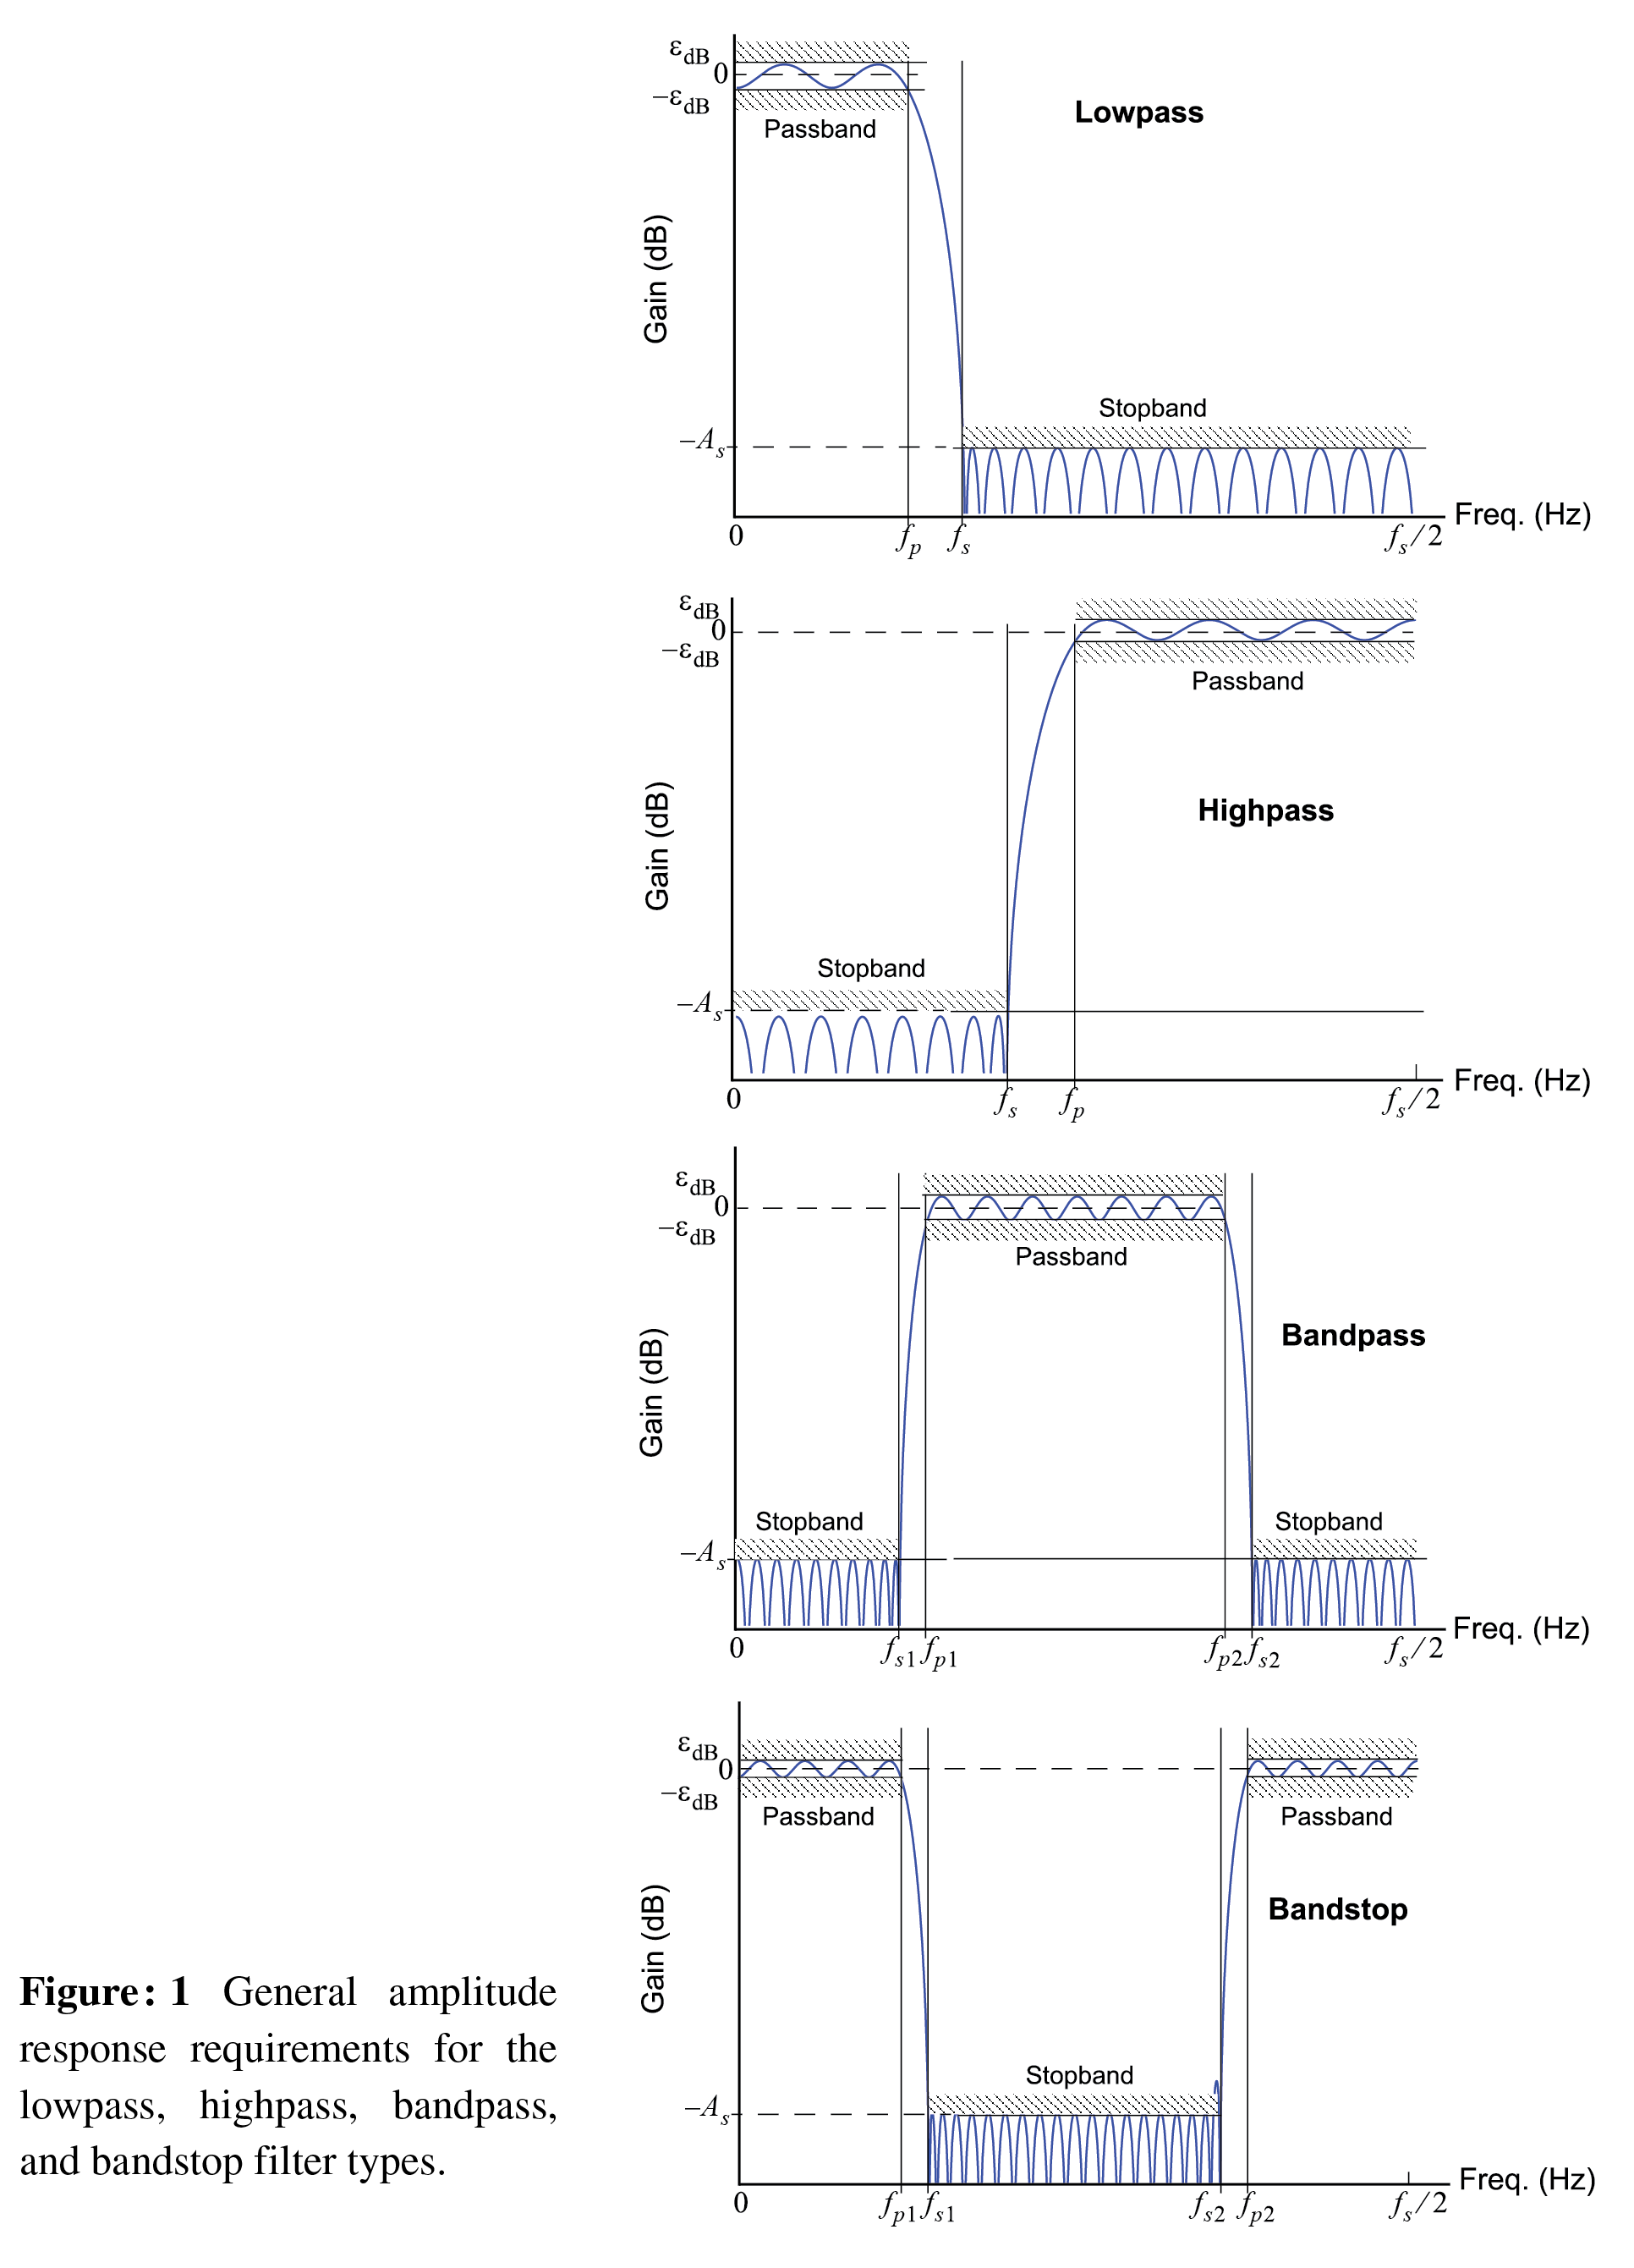

Gambar diatas merupakan diagram yang memperlihatkan karakteristik frekuensi dari berbagai jenis filter dalam pemrosesan sinyal. Diagram ini menunjukkan empat tipe filter utama: lowpass, highpass, bandpass, dan bandstop. Setiap subplot menunjukkan respons amplitude filter terhadap frekuensi. Mari kita analisis masing-masing:

1. **Lowpass Filter (Filter Lolos Rendah):**
   - **Passband:** Bagian ini menunjukkan rentang frekuensi di mana sinyal dapat lolos melalui filter tanpa atau dengan sedikit atenuasi. Ini terletak pada frekuensi rendah mulai dari 0 Hz sampai batas atas frekuensi yang dilewati (frekuensi cutoff).
   - **Stopband:** Ini adalah daerah dimana sinyal-sinyal dengan frekuensi lebih tinggi dari frekuensi cutoff dihambat atau sangat diatenuasi.
  
2. **Highpass Filter (Filter Lolos Tinggi):**
   - **Passband:** Dalam filter ini, passband terletak pada frekuensi tinggi. Filter ini membiarkan frekuensi yang lebih tinggi lolos sementara memblokir frekuensi yang lebih rendah.
   - **Stopband:** Area ini adalah di mana sinyal dengan frekuensi lebih rendah dari frekuensi cutoff diatenuasi.

3. **Bandpass Filter (Filter Lolos Pita):**
   - **Passband:** Filter ini memiliki dua batas frekuensi, frekuensi rendah $\lambda_1$ dan frekuensi tinggi $\lambda_2$. Frekuensi antara dua nilai ini dibiarkan lolos.
   - **Stopband:** Ada dua daerah stopband, satu lebih rendah dari $\lambda_1$ dan yang lainnya lebih tinggi dari $\lambda_2$, di mana frekuensi di luar rentang ini dihambat.

4. **Bandstop Filter (Filter Tangkal Pita):**
   - **Passband:** Pada filter ini, terdapat dua passband yaitu daerah frekuensi yang lebih rendah dari $\lambda_1$ dan daerah frekuensi yang lebih tinggi dari $\lambda_2$. Kedua daerah ini membiarkan frekuensi lolos.
   - **Stopband:** Ini adalah pita frekuensi antara $\lambda_1$ dan $\lambda_2$ di mana frekuensi di dalam range ini dihambat atau diatenuasi.

Diagram ini sangat berguna untuk memahami bagaimana setiap filter beroperasi dan daerah frekuensi mana yang mereka pengaruhi. Grafik kemiringan pada tiap batas menunjukkan karakteristik redaman filter yang realistis di mana transisi antara passband dan stopband tidak secara tiba-tiba tapi bertahap.

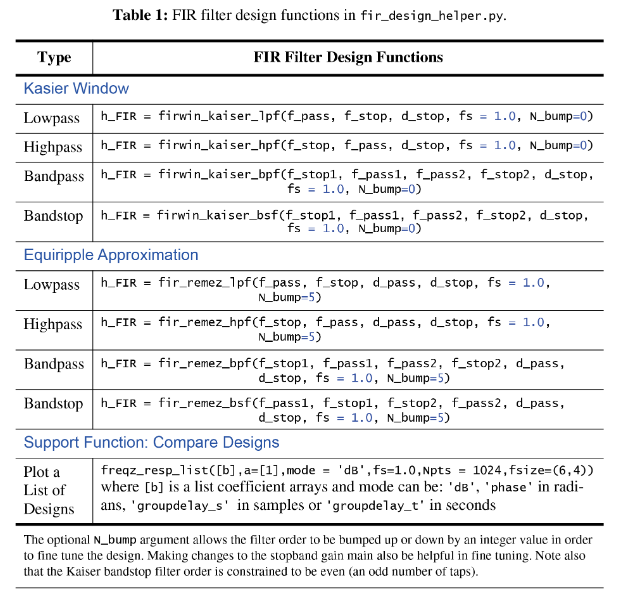

Gambar diatas merupakan tabel yang berisi informasi tentang fungsi desain filter FIR dengan menggunakan window Kaiser dalam pemrograman. Ini terbagi beberapa bagian yang menjelaskan jenis-jenis filter yang dapat didesain, mencakup:

1. **Tipe Filter:**
   - Highpass
   - Lowpass
   - Bandpass
   - Bandstop

2. **Fungsi Desain Filter dalam Pemrograman:**
   - `h = firwin(kaiser_beta, ...)` untuk desain windowed FIR filter menggunakan window kaiser.
   - `h = fir_kaiser(...)` untuk desain filter dengan parameter khusus Kaiser.
   - `h = fir_remez(...)` untuk desain filter menggunakan metode Remez, sering digunakan untuk filter yang memiliki spesifikasi yang sangat khusus atau sulit.
  
3. **Parameter Fungsi:**
   - `N` mewakili orde filter.
   - `fs` mewakili frekuensi sampling.
   - `f_pass, f_stop` mewakili frekuensi batas untuk passband dan stopband.
   - `d_pass, d_stop` mewakili toleransi dalam passband dan stopband.
   - `fs1, fs2` mewakili batas frekuensi untuk filter bandpass dan bandstop.

4. **Anotasi Tambahan:**
   - Fungsi desain ini seringkali termasuk parameter tambahan seperti beta atau bweights yang dapat mengontrol bentuk window atau mempengaruhi penyeimbangan respon frekuensi dari filter.

5. **Plot Section:**
   - Contoh kode untuk memplot respon frekuensi dari filter dengan menggunakan fungsi `freqz`.

6. **Opsional Flags:**
   - Penjelasan tentang penggunaan parameter tambahan dalam fungsi untuk mengatur karakteristik spesifik dari filter yang dirancang, seperti mengelompokkan sampel atau menyesuaikan pengaturan frekuensi.

In [ ]:
# Mendesain filter FIR dengan metode Kaiser menggunakan fungsi firwin_kaiser_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)

# Mendesain filter FIR dengan metode Remez menggunakan fungsi fir_remez_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

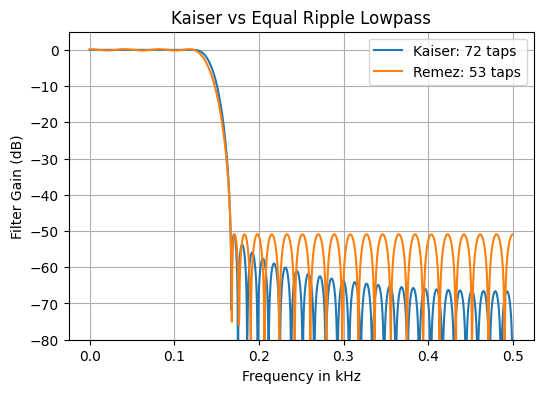

In [ ]:
# Menghitung respons frekuensi dari kedua filter FIR yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k dan b_r),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k), r'Remez: %d taps' % len(b_r)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar diatas menampilkan grafik yang membandingkan dua jenis filter lowpass: filter Kaiser dan filter Remez (juga dikenal sebagai filter Equal Ripple). Grafik ini menggambarkan "filter gain" dalam satuan desibel (dB) terhadap frekuensi yang diukur dalam kiloHertz (kHz).

### Komponen Grafik:
- **Sumbu X**: Menunjukkan frekuensi dari 0 hingga 0.5 kHz.
- **Sumbu Y**: Menunjukkan gain filter dalam satuan desibel (dB) yang berkisar dari 0 dB hingga sekitar -100 dB.

### Kurva:
- **Kurva Oranye (Kaiser)**: Ini menunjukkan performa filter Kaiser yang dimulai pada deepang tinggi hampir 0 dB dan turun tajam di sekitar frekuensi 0.1 kHz, mencapai penurunan hingga sekitar -100 dB, dan menunjukkan sedikit ripple (fluktuasi kecil).
- **Kurva Biru (Remez atau Equal Ripple)**: Kurva ini menunjukkan performa filter Remez yang dimulai dari tingkat yang tinggi mendekati 0 dB dan juga turun tajam di sekitar 0.1 kHz, tetapi menunjukkan ripple yang lebih jelas dan seragam dalam kisaran penolakannya dibandingkan dengan filter Kaiser.

### Ringkasan Performa:
- Filter Kaiser dengan 72 taps dan filter Remez dengan 53 taps menunjukkan keefektifan dalam menekan frekuensi di luar batas passband mereka (di atas 0.1 kHz), namun keduanya memiliki karakteristik yang berbeda dalam hal ripple. Filter Kaiser menunjukkan penurunan yang sangat tajam dan lebih stabil, sedangkan filter Remez menunjukkan ripple yang lebih teratur dalam band penolakan (stopband).

In [ ]:
# Mendesain filter FIR high-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)

# Mendesain filter FIR high-pass dengan metode Remez menggunakan fungsi fir_remez_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

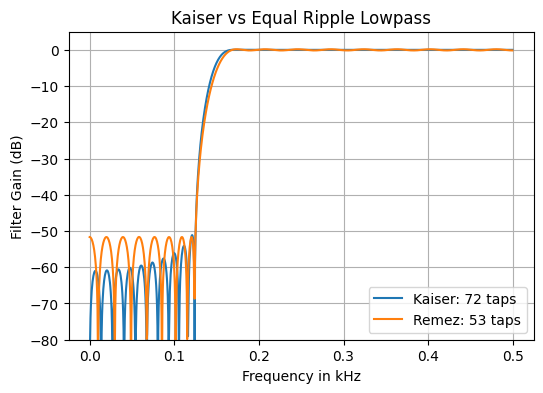

In [ ]:
# Menghitung respons frekuensi dari kedua filter FIR high-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_hp dan b_r_hp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k_hp), r'Remez: %d taps' % len(b_r_hp)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar diatas adalah grafik yang membandingkan dua jenis lowpass filter (filter lolos rendah) dalam hal keuntungan filter (filter gain) terhadap frekuensi dalam kHz (kilohertz). Grafik ini memiliki dua kurva yang mewakili:

1. **Kaiser Filter:** Diperlihatkan dengan warna biru, memiliki 72 taps. Kurva ini menunjukkan respon frekuensi yang lebih gelombang (ripply) di sekitar tepi band stop dan band pass. Ripples ini menunjukkan variasi kecil dalam keuntungan filter di sepanjang area tersebut.

2. **Equal Ripple (Remez) Filter:** Diperlihatkan dengan warna oranye dan memiliki 53 taps. Respon frekuensi dari filter Remez mencapai penurunan yang lebih tajam dan lebih konsisten setelah batas frekuensi cutoff sekitar 0.1 kHz, dengan tingkat ripple yang hampir sama di seluruh rentang frekuensi stop band.

In [ ]:
# Mendesain filter FIR band-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (50), dan frekuensi sampling (48000).
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)

# Mendesain filter FIR band-pass dengan metode Remez menggunakan fungsi fir_remez_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (0.2), jumlah taps (50), dan frekuensi sampling (48000).
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

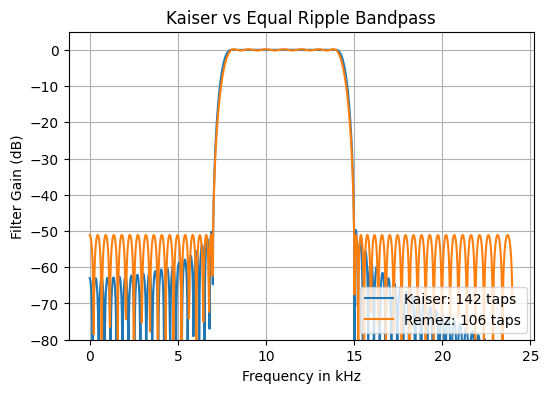

In [ ]:
# Menghitung respons frekuensi dari kedua filter FIR band-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_bp dan b_r_bp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=48 karena frekuensi sampling adalah 48 kHz).
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Bandpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter, diletakkan di pojok kanan bawah
legend((r'Kaiser: %d taps' % len(b_k_bp), r'Remez: %d taps' % len(b_r_bp)), loc='lower right')

# Menampilkan grid pada plot
grid()


Gambar diatas menampilkan grafik yang membandingkan kinerja dua jenis filter digital yang digunakan dalam pemrosesan sinyal, yaitu Kaiser dan Equal Ripple (sering kali dikenal sebagai filter Remez). Grafik ini menggunakan sumbu horizontal untuk menunjukkan frekuensi dalam kilohertz (kHz) dan sumbu vertikal untuk menunjukkan gain filter dalam decibel (dB).

Filter Kaiser dan filter Remez, masing-masing, direpresentasikan dengan kurva warna berbeda dalam grafik:
- Kurva warna oranye menunjukkan respon frekuensi dari filter Kaiser.
- Kurva warna biru menunjukkan respon frekuensi dari filter Remez.

Grafik menunjukkan bahwa kedua filter memiliki "passband" (rentang frekuensi di mana sinyal diizinkan melewati filter dengan sedikit atau tanpa attenuasi) yang cukup lebar antara 0 dan kurang lebih 10 kHz. Lalu muncul "stopband" (rentang frekuensi di mana sinyal diblokir atau sangat direduksi) dimana performa kedua filter mulai berbeda. Filter Kaiser memiliki variasi yang lebih terkontrol di stopband (kurva lebih halus), sedangkan filter Remez menunjukkan "ripple" atau fluktuasi yang lebih tajam.

Dibawah grafik, ada keterangan yang memberikan informasi lebih lanjut tentang konfigurasi filter: Filter Kaiser menggunakan 142 taps, sementara filter Remez menggunakan 106 taps. “Taps” adalah istilah dalam desain filter FIR yang merujuk kepada jumlah koefisien yang digunakan dalam pemfilteran, di mana lebih banyak taps seringkali berarti respon frekuensi filter yang lebih presisi atau lebih baik.


In [ ]:
# Mendesain filter FIR low-pass menggunakan metode Remez
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (3300 dan 4300),
# normalized band edges (0.5), jumlah taps (60), dan frekuensi sampling (96000).
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

In [ ]:
# Membuat filter FIR dengan metode multirate menggunakan fungsi multirate_FIR()
# Parameter yang diberikan adalah koefisien filter FIR (b_up).
mr_up = mrh.multirate_FIR(b_up)

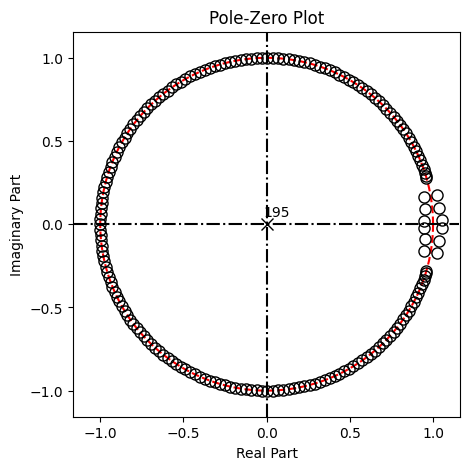

In [ ]:
# Menampilkan konfigurasi pole-zero dari filter FIR dengan jumlah tap yang sangat tinggi
# (linear phase FIR) menggunakan metode zplane() dari objek multirate_FIR.
mr_up.zplane()

Gambar diatas merupakan sebuah plot kutub-nol (pole-zero plot) yang digunakan dalam analisis dan desain sistem kontrol atau sistem pemrosesan sinyal. Plot ini menampilkan lokasi kutub dan nol dari suatu fungsi transfer di bidang kompleks.

1. **Sumbu Horizontal (Real Part):** Sumbu ini menunjukkan bagian real dari bilangan kompleks. Nilai negatif menunjukkan penurunan, sedangkan nilai positif menunjukkan peningkatan.

2. **Sumbu Vertikal (Imaginary Part):** Sumbu ini menunjukkan bagian imajiner dari bilangan kompleks.

3. **Titik-titik Merah (Kutub):** Titik-titik merah ini mewakili kutub dari fungsi transfer. Kutub adalah nilai di mana fungsi transfer menjadi tak terbatas atau memiliki singularitas.

4. **Titik-titik Hitam (Nol):** Titik-titik hitam ini mewakili nol dari fungsi transfer. Nol adalah nilai dimana fungsi transfer menjadi nol.

5. **Cincin Besar:** Cincin besar yang diperlihatkan di plot menandakan bahwa nilai-nilai kutub diletakkan secara simetris di sepanjang garis yang membentuk lingkaran sempurna pada bidang kompleks, menunjukkan bentuk khusus dari fungsi transfer, mungkin terkait dengan filter atau sistem resonansi tertentu.

6. **Bilangan pada Plot:** Angka 95 yang terletak di bagian kanan atas gambar mungkin mengindikasikan jumlah total kutub atau nol, atau bisa juga merupakan label lain yang berkaitan dengan data plot.

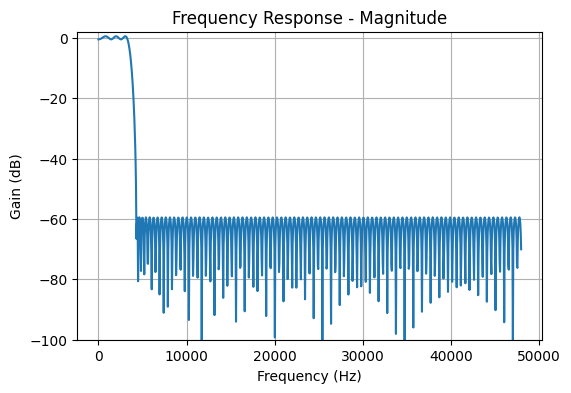

In [ ]:
# Memverifikasi respons frekuensi di passband dan stopband sesuai dengan yang diharapkan
# menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (96000 Hz).
mr_up.freq_resp('db',96000)

Gambar diatas adalah grafik yang menampilkan respon frekuensi - magnitudo dari sebuah sistem atau komponen elektronik. Grafik ini menggambarkan bagaimana sistem atau komponen tersebut merespons berbagai frekuensi sinyal dalam satuan desibel (dB) terhadap skala frekuensi dari 0 hingga 50.000 Hertz (Hz).

Pada grafik tersebut terlihat beberapa ciri khas:

1. **Penurunan Cepat di Frekuensi Rendah**: Di awal grafik, sekitar frekuensi 0 Hz hingga sekitar 1000 Hz, terjadi penurunan sangat tajam dalam gain. Penurunan ini menunjukkan bahwa sistem memiliki respons sangat rendah pada frekuensi rendah atau kemungkinan adanya filter high-pass yang menghilangkan komponen frekuensi rendah ini.

2. **Oscilasi di Frekuensi Tinggi**: Mulai sekitar 1000 Hz hingga 50.000 Hz, terdapat banyak osilasi atau fluktuasi dalam gain. Amplitudo osilasi ini konsisten tetapi memiliki nilai yang relatif rendah jika dibandingkan dengan respons di frekuensi yang sangat rendah, menunjukkan bahwa sistem merespons di frekuensi ini dengan fluktuasi yang cukup stabil dan teratur.

3. **Rentang Frekuensi Lebar**: Grafik menunjukkan respon sistem terhadap suatu rentang frekuensi yang sangat lebar, dari 0 Hz hingga 50.000 Hz, yang mencakup spektrum audio dan juga rentang yang lebih tinggi, yang bisa relevan untuk aplikasi seperti ultrasonik atau komunikasi data frekuensi tinggi.

In [ ]:
# Menghitung jumlah taps dari filter FIR dengan mengurangkan 1 dari panjang koefisien filter (len(b_up)-1)
# dan kemudian membaginya dengan 2.
(len(b_up-1))/2

98.0

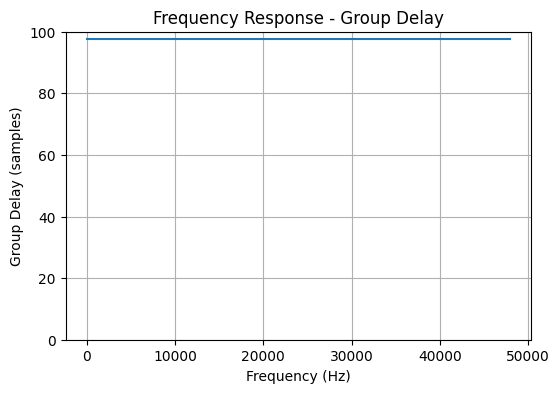

In [ ]:
# Memverifikasi bahwa desain FIR memiliki group delay yang konstan dengan menghitung
# respons group delay menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons ('groupdelay_s'), frekuensi sampling (96000 Hz),
# dan range frekuensi [0, 100].
mr_up.freq_resp('groupdelay_s', 96000, [0, 100])

Grafik diatas adalah grafik yang menggambarkan Group Delay sebagai fungsi dari Frequency dalam satuan Hertz (Hz). Di sisi vertikal (sumbu Y), kita memiliki 'Group Delay' yang diukur dalam satuan 'samples'. Di sisi horizontal (sumbu X), kita memiliki 'Frequency' diukur dalam Hertz (Hz).

**Group Delay** adalah ukuran waktu yang diperlukan untuk sinyal untuk melakukan perjalanan melalui sistem, dan biasanya sangat penting dalam penganalisisan sistem audio dan respons frekuensi. Dalam konteks ini, grafik bertujuan untuk menunjukkan bagaimana delay grup berubah seiring dengan perubahan frekuensi.

Grafik terlihat relatif rata pada nilai group delay, yang sekitar 100 sampel, tanpa adanya perubahan yang signifikan sepanjang spektrum frekuensi yang diberikan, dari 0 Hz hingga 50000 Hz. Ini menunjukkan bahwa sistem atau perangkat yang diuji memiliki group delay yang konsisten di semua frekuensi yang diuji. Stabilitas dalam group delay biasanya menunjukkan bahwa sistem memiliki fase linear atau mendekati linear, yang penting untuk mempertahankan integritas temporal dari sinyal yang diproses.


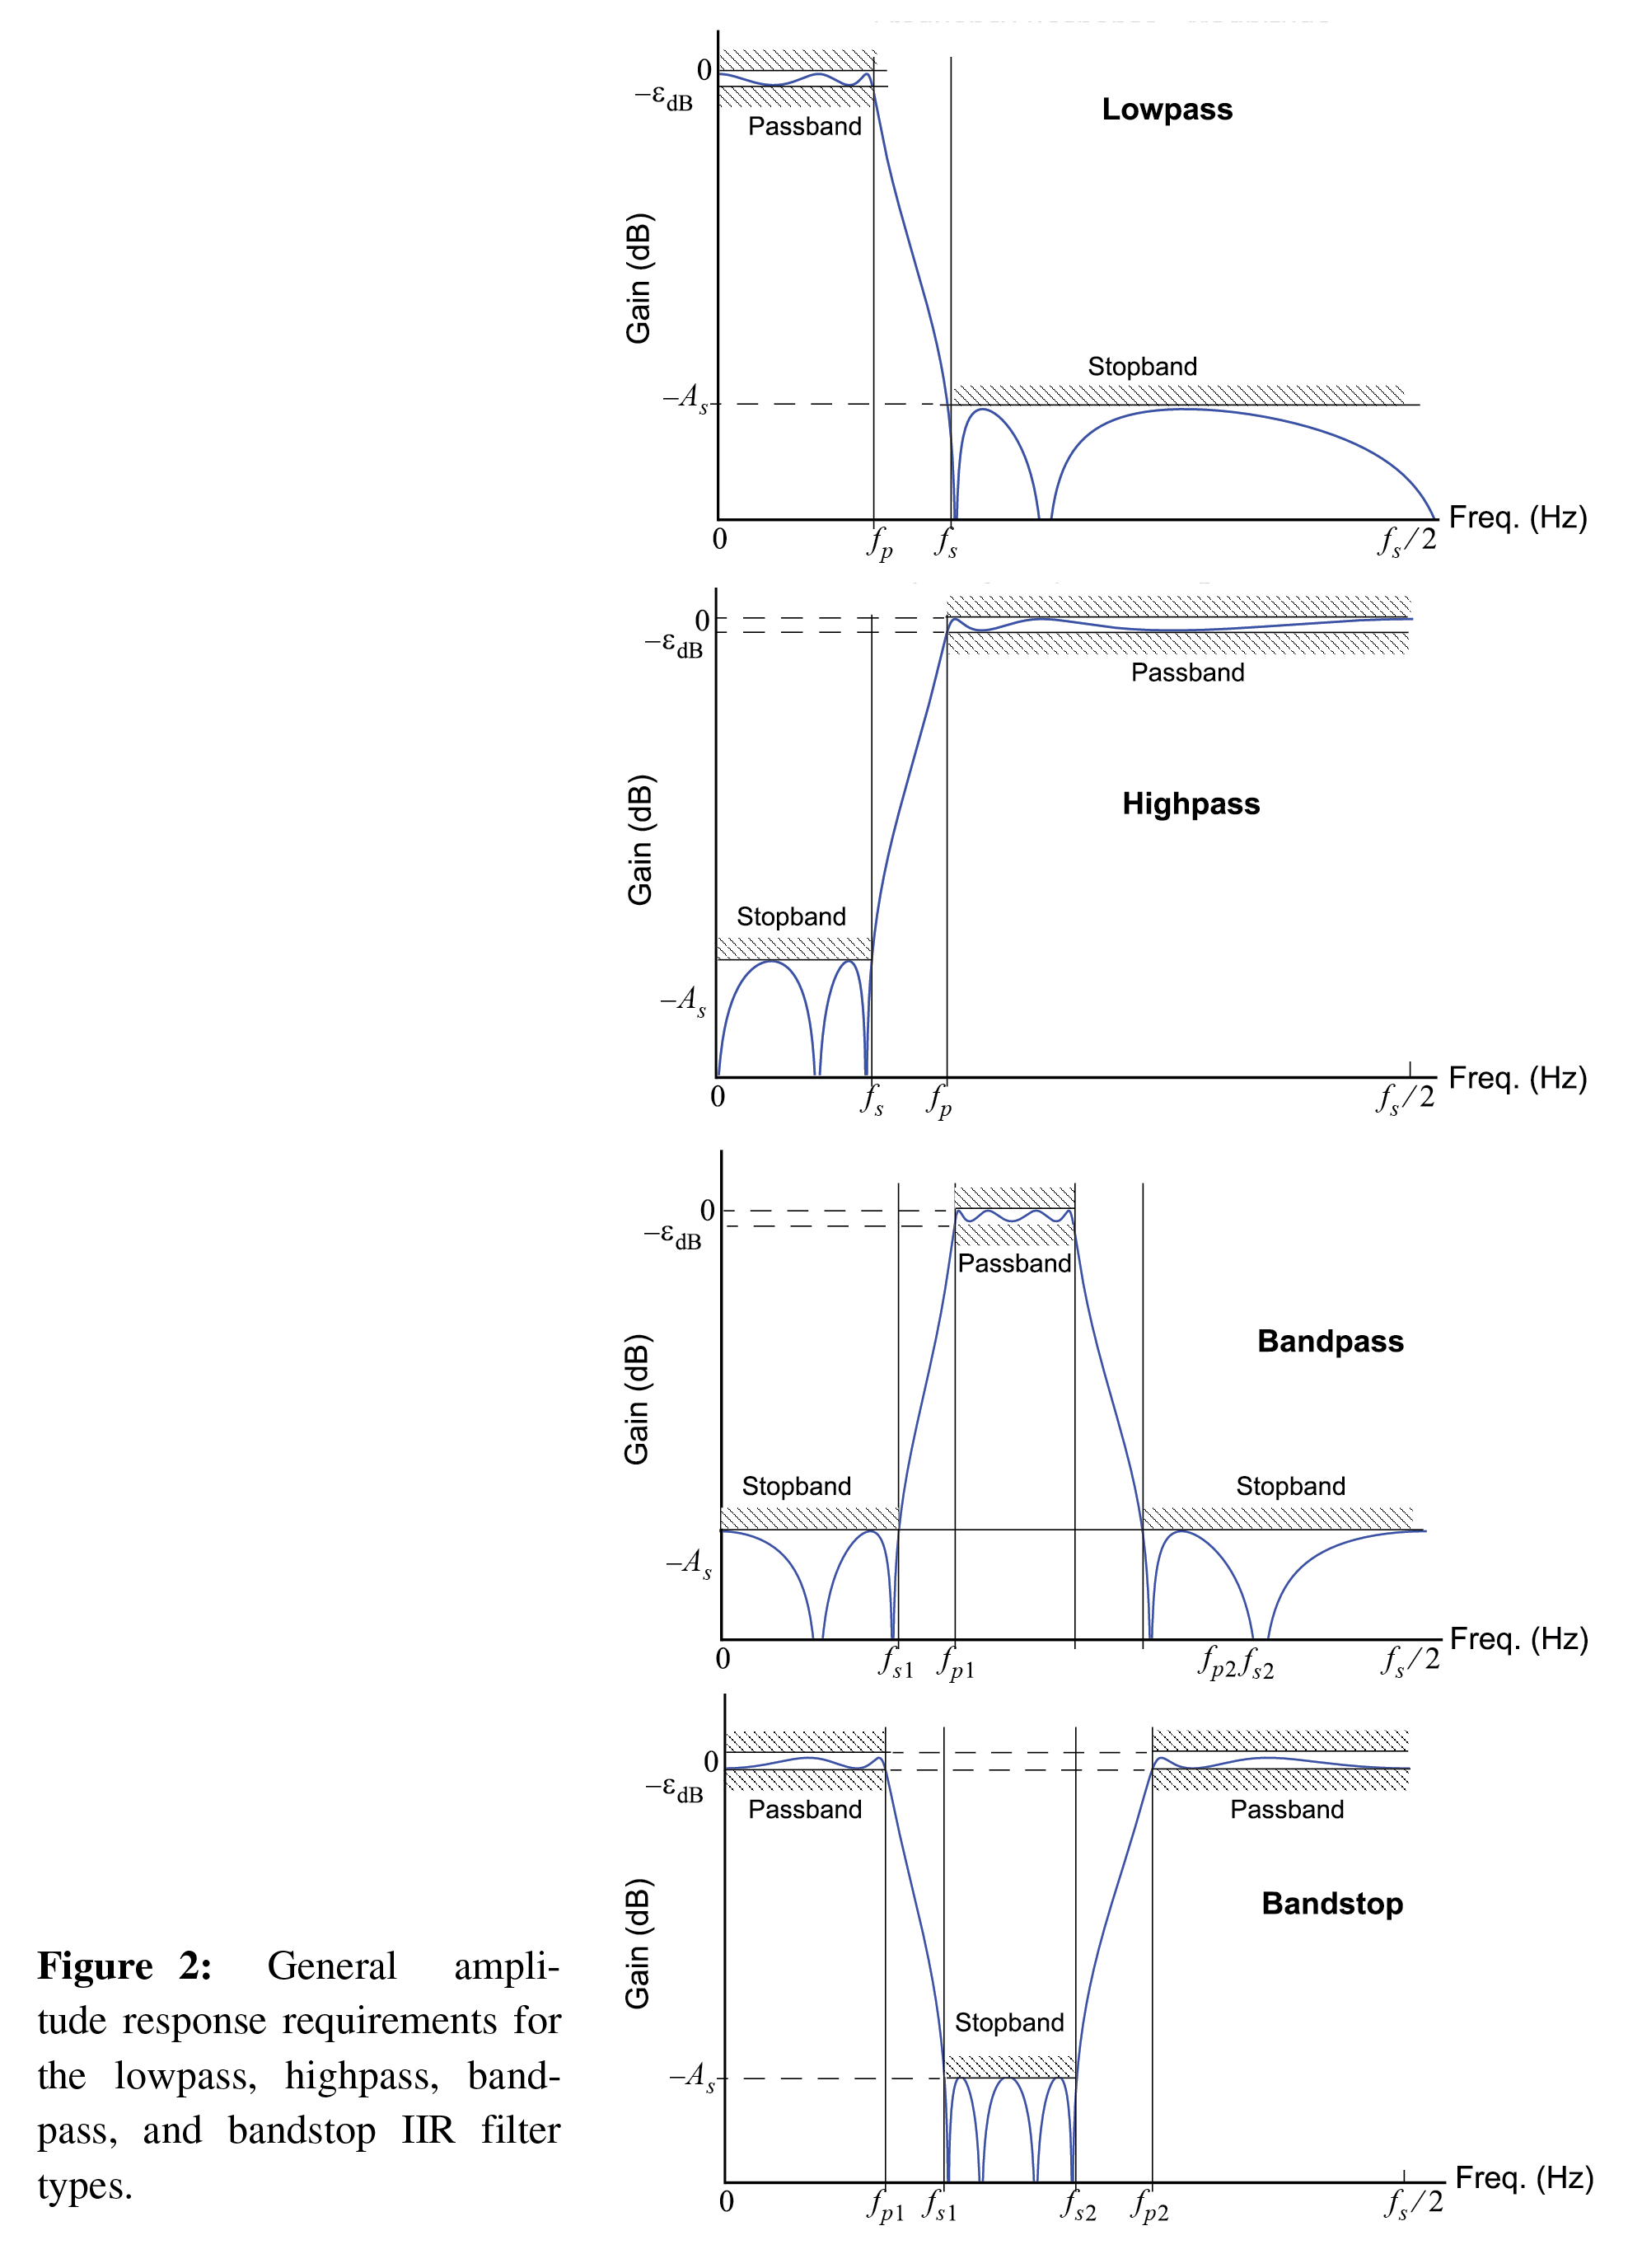

Gambar diatas menunjukkan empat jenis tanggapan frekuensi dari filter-filter IIR (Infinite Impulse Response). Di bawah ini, saya menguraikan masing-masing jenis filter yang ditampilkan pada gambar:

1. **Lowpass Filter (Filter Lolos-Rendah)**:
   - **Tanggapan Frekuensi**: Filter ini memungkinkan sinyal dengan frekuensi yang lebih rendah dari frekuensi potong (`f_c`) untuk lolos tanpa banyak pengurangan, dan mengurangi sinyal dengan frekuensi di atasnya.
   - **Frekuensi Potong (`f_c`)**: Frekuensi di mana daya output filter adalah setengah dari daya maksimumnya (biasanya ditandai sebagai -3 dB).
   - **Stopband**: Area di atas frekuensi potong (`f_c`) dimana frekuensi tinggi sangat diatenuasi.

2. **Highpass Filter (Filter Lolos-Tinggi)**:
   - **Tanggapan Frekuensi**: Filter ini memungkinkan sinyal dengan frekuensi lebih tinggi dari frekuensi potong (`f_c`) untuk lolos, dan mengurangi sinyal dengan frekuensi di bawahnya.
   - **Frekuensi Potong (`f_c`)**: Sama seperti pada lowpass, ini adalah titik di mana daya output berkurang menjadi setengah dari daya maksimumnya pada frekuensi rendah.
   - **Stopband**: Area di bawah frekuensi potong dimana frekuensi rendah sangat diatenuasi.

3. **Bandpass Filter (Filter Lolos-Pita)**:
   - **Tanggapan Frekuensi**: Filter ini dirancang untuk memungkinkan hanya frekuensi dalam rentang tertentu `f_1` hingga `f_2` untuk lolos.
   - **Frekuensi Potong (`f_1` dan `f_2`)**: Batas bawah dan atas dimana daya output mulai berkurang.
   - **Stopband**: Terdapat dua stopband, satu di bawah `f_1` dan satu lagi di atas `f_2`, dimana frekuensi di luar pita tersebut diatenuasi.

4. **Bandstop Filter (Filter Sumbat-Pita)**:
   - **Tanggapan Frekuensi**: Filter ini berfungsi sebaliknya dari Bandpass, yaitu mengatenuasi frekuensi dalam rentang tertentu `f_1` hingga `f_2`, dan membiarkan frekuensi di luar rentang tersebut lolos.
   - **Frekuensi Potong (`f_1` dan `f_2`)**: Batas bawah dan atas dimana daya output filter sangat berkurang di dalam pita tersebut.
   - **Stopband**: Area antara `f_1` dan `f_2` di mana frekuensi menjadi sangat diatenuasi.

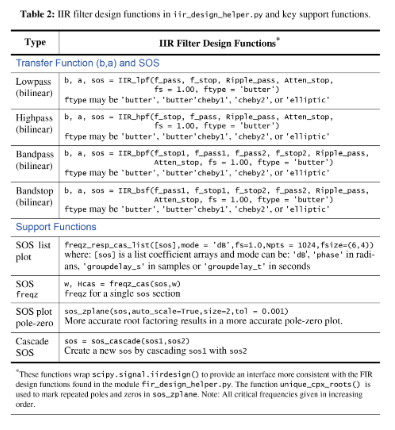

Gambar diatas merupakan sebuah tabel dari dokumen ilmiah atau buku teknik yang menjelaskan berbagai fungsi transfer dan fungsi saringan (filter) dalam konteks IR (Interactive Response) dan SOS (Second Order Section). Tabel ini, yang diberi judul "IR and SOS Filter Design Functions," didesain untuk menunjukkan diferensiasi fungsi-fungsinya sesuai tipe biquad seperti 'butter' untuk Butterworth, 'cheby1' untuk Chebyshev tipe 1, dan lain-lain.

Detailnya sebagai berikut:
1. **Butterworth (butter)**, **Chebyshev I (cheby1)**, dan **Chebyshev II (cheby2)** – Semua jenis saringan ini menggunakan biquad dengan bilinear transform method untuk mendesain saringan dengan tipe lowpass, highpass, bandpass, dan bandstop.
2. **Elliptic (ellip)** – Menggunakan metode yang sama dengan ketiga tipe sebelumnya dengan opsi tipe respons yang sama.
3. **Fungsi-fungsi SOS** – Fungsi-fungsi ini digunakan untuk proses desain yang membagi saringan-saringan menjadi sejumlah seksyen orde dua, menciptakan saringan yang lebih stabil dan efisien dalam memproses real-time.

Tabel ini juga termasuk referensi fungsi Matlab (`freqz`, `impz`, `grpdelay`, `zp2sos`), yang berguna untuk menganalisis dan mengimplementasikan desain saringan.

In [ ]:
# Mendesain filter IIR low-pass dengan beberapa jenis filter (Butterworth, Chebyshev Type I,
# Chebyshev Type II, dan Elliptic) menggunakan fungsi IIR_lpf().
# Parameter-parameter yang diberikan adalah frekuensi passband (f_pass), frekuensi stopband (f_stop),
# ripple passband (0.5), jumlah taps (60), frekuensi sampling (fs), dan jenis filter ('butter', 'cheby1', 'cheby2', 'ellip').
fs = 48000
f_pass = 5000
f_stop = 8000
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

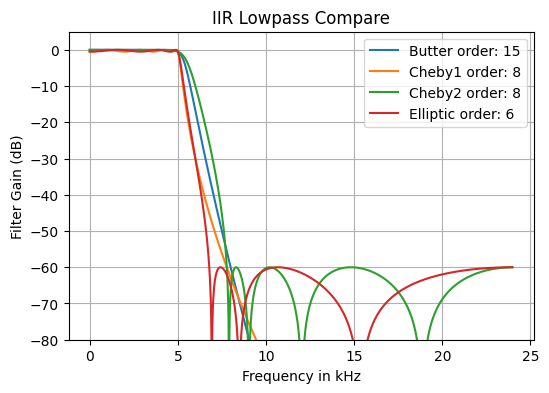

In [ ]:
# Memplot respons frekuensi dari filter IIR low-pass dengan berbagai jenis filter
# menggunakan fungsi freqz_resp_cas_list() dari paket iir_d.
# Parameter-parameter yang diberikan adalah daftar second-order sections (sos) dari masing-masing jenis filter,
# tipe respons (dB untuk respons dalam dB), dan frekuensi sampling (48 kHz).
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'IIR Lowpass Compare')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan urutan filter dan jumlah order untuk setiap jenis filter
legend((r'Butter order: %d' % (len(a_but) - 1),
        r'Cheby1 order: %d' % (len(a_cheb1) - 1),
        r'Cheby2 order: %d' % (len(a_cheb2) - 1),
        r'Elliptic order: %d' % (len(a_elli) - 1)), loc='best')

# Menampilkan grid pada plot
grid()

Gambar diatas adalah grafik yang membandingkan kinerja berbagai filter lowpass IIR (Infinite Impulse Response) berdasarkan tipe dan orde filter. Dalam grafik ini, sumbu horizontal menunjukkan frekuensi dalam kiloHertz (kHz), dan sumbu vertikal menunjukkan gain filter dalam desibel (dB). Di sini, keempat filter dibedakan dengan warna dan tipe garis yang berbeda untuk mewakili respon frekuensinya:

1. **Butterworth order 15** (garis biru): Filter ini menampilkan kurva yang halus dan mendekati ideal, dengan transisi yang relatif lambat dari frekuensi passband ke stopband.

2. **Chebyshev order 1 8** (garis merah): Filter Chebyshev tipe 1 memiliki ripple di passband. Orde 8 menunjukkan bahwa filter ini mencapai cutoff dengan lebih cepat dibandingkan Butterworth, namun ada sedikit undershoot dan overshoot (ripple).

3. **Chebyshev order 2 8** (garis hijau): Filter Chebyshev tipe 2 memiliki ripple di stopband dan tindakannya sedikit lebih tajam dalam transisi dibandingkan tipe 1.

4. **Elliptic order 6** (garis hijau tua): Filter ini dikenal dengan kinerja paling tajam dalam transisi dari passband ke stopband dalam urutan yang lebih rendah dibandingkan filter lainnya, namun ia juga menunjukkan ripple yang signifikan di kedua passband dan stopband.

(15, 15)

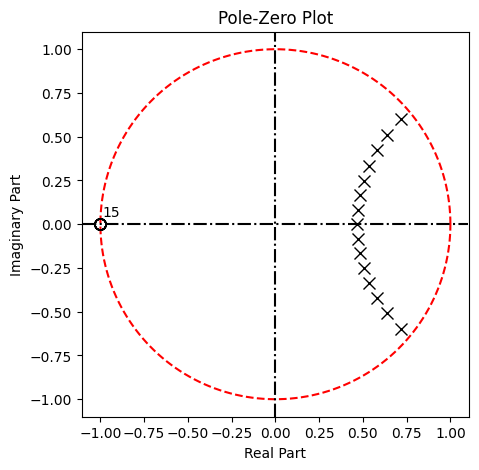

In [ ]:
# Menampilkan konfigurasi pole-zero dari filter IIR menggunakan metode sos_zplane()
# dari paket iir_d. Parameter yang diberikan adalah second-order sections (sos) dari filter Butterworth.
iir_d.sos_zplane(sos_but)

Gambar diatas adalah sebuah plot kutub-nol (pole-zero plot) yang digunakan dalam analisis sistem kontrol atau sistem pemrosesan sinyal. Grafik ini digambarkan dalam bidang kompleks dengan sumbu horizontal yang menunjukkan bagian real dan sumbu vertikal yang menunjukkan bagian imajiner.

Pada plot ini:
- Titik "X" menandakan lokasi nol dari fungsi transfer, yaitu nilai-nilai input yang membuat output fungsi tersebut menjadi nol.
- Lingkaran "O" menandakan lokasi kutub dari fungsi transfer, yaitu nilai-nilai di mana fungsi transfer menjadi tak terhingga atau sistem menjadi tidak stabil.

Lingkaran putus-putus merah menunjukkan suatu batas atau lokasi khusus dalam analisis, yang mungkin digunakan untuk menilai stabilitas atau karakteristik lain dari sistem.

Dari plot ini, kita dapat melihat bahwa sistem memiliki banyak nol dan beberapa kutub, dipusatkan di sekitar asal koordinat (0,0) dalam bidang kompleks.

In [ ]:
# Mendesain filter IIR low-pass menggunakan metode Elliptic
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1950 dan 2050),
# normalized band edges (0.5), jumlah taps (80), frekuensi sampling (8000 Hz), dan jenis filter ('ellip').
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Membuat filter IIR dengan metode multirate menggunakan fungsi multirate_IIR()
mr_lp = mrh.multirate_IIR(sos_lp)

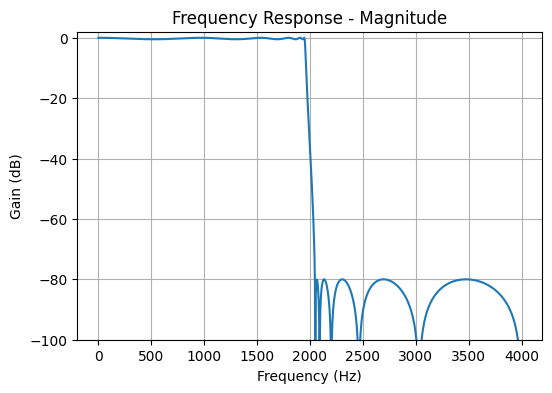

In [ ]:
# Menghitung respons frekuensi dari filter IIR menggunakan metode multirate
# Parameter-parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (8000 Hz).
mr_lp.freq_resp('db', 8000)

Gambar diatas menunjukkan grafik respons frekuensi dalam satuan Magnitude yang menggambarkan tingkat penguatan (Gain) dalam satuan desibel (dB) terhadap frekuensi dalam satuan Hertz (Hz).

Dapat dilihat dari grafik:
1. Ada penonjolan besar (peak) yang terjadi sekitar frekuensi 0 Hz hingga 500 Hz, di mana gain mendekati 0 dB. Ini menandakan bahwa sistem memiliki respons penguatan yang sangat baik dan hampir tidak ada pengurangan sinyal pada rentang frekuensi ini.
2. Pada frekuensi sekitar 1000 Hz, terjadi penurunan tajam mendekati -80 dB, menunjukkan bahwa pada frekuensi ini ada penyerapan atau penolakan yang sangat besar terhadap sinyal masuk.
3. Lalu, terdapat beberapa puncak dan lembah yang terjadi antara 1000 Hz hingga 3500 Hz dengan tingkat penguatan yang bervariasi dari -40 dB hingga -80 dB. Ini menandakan berbagai variasi pada respons sistem terhadap sinyal pada frekuensi-frekuensi tersebut.
4. Frekuensi di atas 3500 Hz tidak digambarkan detail responsnya pada grafik ini, tetapi bisa diperkirakan bahwa responsnya relatif stabil atau tidak sefluktuatif pada frekuensi lebih rendah.

(-130.0, -30.0)

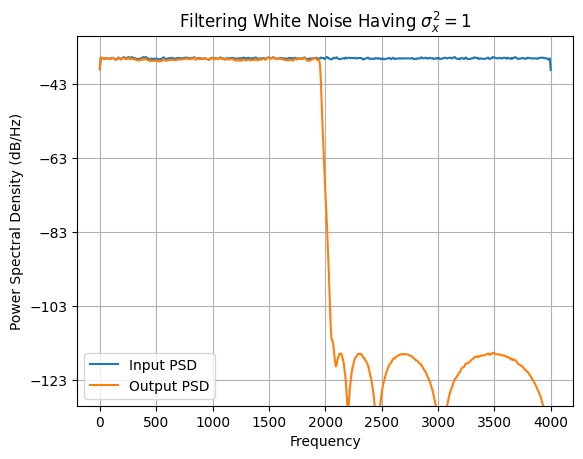

In [ ]:
# Menghasilkan 1 juta sampel data acak menggunakan fungsi randn()
x = randn(1000000)

# Memfilter data menggunakan filter multirate yang telah dibuat
y = mr_lp.filter(x)

# Menghitung dan memplot spektrum daya menggunakan fungsi psd()
# Parameter yang diberikan adalah data (x dan y), jumlah sampel FFT (2^10), dan frekuensi sampling (8000 Hz).
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)

# Menambahkan judul pada plot
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Menambahkan legenda dengan label 'Input PSD' dan 'Output PSD' pada lokasi terbaik
legend(('Input PSD', 'Output PSD'), loc='best')

# Mengatur batas sumbu y dari -130 hingga -30
ylim([-130, -30])

Gambar diatas adalah grafik yang menunjukkan Perbandingan Kepadatan Spektral Daya (Power Spectral Density - PSD) sebelum dan sesudah proses filtrasi noise.

1. **Penjelasan Variabel-variabel pada Grafik:**
   - **Sumbu y (vertikal)** menunjukkan Kepadatan Spektral Daya dalam dB/Hz.
   - **Sumbu x (horizontal)** menunjukkan Frekuensi dalam Hz.

2. **Legenda Grafik:**
   - **Biru ("Input PSD")** merepresentasikan PSD dari sinyal input, yaitu sinyal yang belum di-filter atau sinyal asli yang mengandung noise.
   - **Oranye ("Output PSD")** merepresentasikan PSD dari sinyal output, yaitu sinyal yang telah melalui proses filtrasi.

3. **Interpretasi Gambar:**
   - Grafik ini menggambarkan efektivitas filter dalam mengurangi noise pada sinyal. Noise diasumsikan memiliki varians (σ²x) sebesar 1, yang menunjukkan intensitas atau level noise.
   - PSD input pada frekuensi rendah menunjukkan noise yang lebih tinggi, yang secara signifikan berkurang pada PSD output, menunjukkan bahwa filter berhasil mengurangi sebagian besar noise di frekuensi tersebut.
   - Terdapat puncak-puncak pada PSD output yang mungkin menunjukkan frekuensi di mana filter kurang efektif dalam meredam noise atau tempat di mana sinyal asli memiliki komponen yang penting.

In [ ]:
# Menentukan frekuensi sampling
fs = 8000

# Menghitung dan mencetak PSD yang diharapkan dalam satuan dB/Hz menggunakan rumus 10*log10(fs)
print('Expected PSD of %2.3f dB/Hz' % (0 - 10 * log10(fs),))

Expected PSD of -39.031 dB/Hz


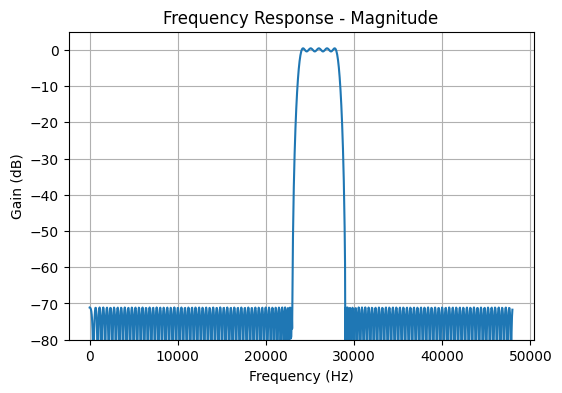

In [ ]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();

Gambar diatas menunjukkan grafik tanggapan frekuensi (Frequency Response) dengan skala keuntungan dalam desibel (dB) terhadap frekuensi dalam Hertz (Hz). Grafik ini spesifik untuk menunjukkan bagaimana suatu sistem atau komponen elektronik, seperti speaker atau filter, merespon pada berbagai frekuensi.

Di sini, sumbu y melambangkan keuntungan atau penguatan (Gain) dalam desibel (dB), dan sumbu x melambangkan frekuensi dalam Hertz (Hz). Area yang berwarna biru menunjukkan bagaimana keuntungan berubah tergantung pada frekuensi.

Dari grafik, kita bisa melihat beberapa fitur:
- Ada penguatan maksimum yang sangat terbatas dalam rentang frekuensi yang sempit sekitar 10.000 Hz hingga 20.000 Hz, dimana penguatan mencapai puncak hampir 0 dB dan sangat tajam.
- Di luar rentang frekuensi tersebut, keuntungan jatuh dengan drastis ke nilai di bawah -60 dB, menunjukkan bahwa sistem atau komponen ini sangat membatasi frekuensi di luar rentang tersebut, kemungkinan besar ini adalah fitur filter band-pass yang menyaring frekuensi di luar zona tertentu.

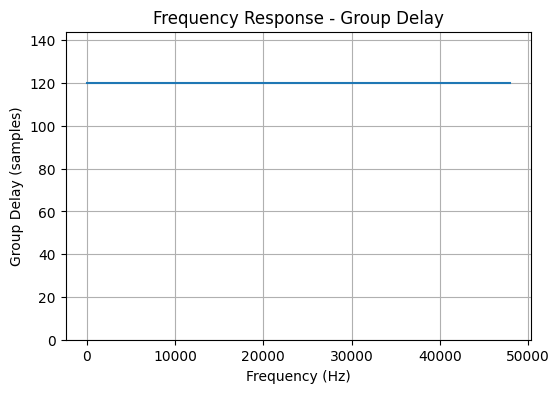

In [ ]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Grafik diatas adalah plot yang menggambarkan "Group Delay" terhadap "Frequency" untuk suatu sistem atau komponen elektronik. Ini adalah tipe diagram yang sering digunakan dalam analisis sistem audio atau sistem komunikasi untuk mengevaluasi bagaimana suatu sinyal dipengaruhi oleh sistem di berbagai frekuensi.

1. **Sumbu X (Frekuensi)**: Menunjukkan frekuensi sinyal dari 0 Hz hingga 50.000 Hz. Ini merupakan range frekuensi yang luas, mencakup dari frekuensi sangat rendah hingga frekuensi yang cukup tinggi, yang seringkali mencakup spektrum audio dan sebagian frekuensi radio.

2. **Sumbu Y (Group Delay - dalam sampel)**: Menujukkan nilai group delay yang diukur dalam jumlah sampel. Group delay adalah ukuran waktu yang diperlukan oleh semua komponen frekuensi sinyal untuk melewati sistem. Nilai yang konstan (sekitar 140 sampel dalam kasus ini) menunjukkan bahwa delay tidak berubah sepanjang rentang frekuensi yang diuji, yang idealnya menunjukkan bahwa fase sinyal tidak terdistorsi secara signifikan oleh sistem pada berbagai frekuensi.

3. **Pengamatan Umum**: Dalam grafik ini, group delay tetap konstan di nilai sekitar 140 sampel untuk semua frekuensi yang direpresentasikan. Ini bisa diinterpretasikan bahwa sistem memiliki karakteristik phase-linear terhadap frekuensi, yang bisa dianggap baik dalam banyak aplikasi audio dan komunikasi karena meminimasi distorsi fase.

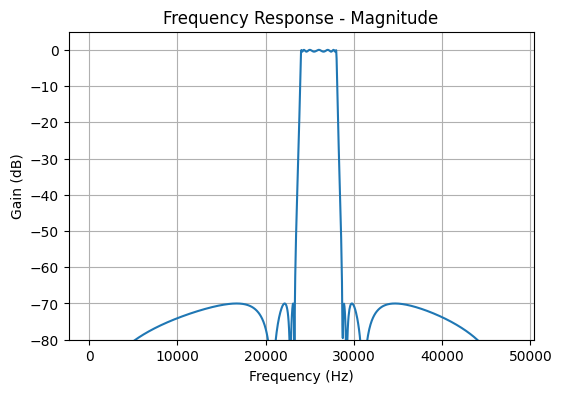

In [ ]:
# Merancang filter band-pass menggunakan metode IIR elliptic
b_rec_bpf2, a_rec_bpf2, sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                     0.5,70,96000,'ellip')

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
with np.errstate(divide='ignore'):  # Mengabaikan pembagian dengan nol yang mungkin terjadi
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();


Gambar diatas menunjukkan grafik respons frekuensi dalam bentuk magnitudo. Grafik ini secara khusus menggambarkan hubungan antara gain, yang diukur dalam desibel (dB), dan frekuensi, yang diukur dalam Hertz (Hz). Ini adalah alat yang umum digunakan dalam analisis sistem audio, filter, dan elektronik lainnya untuk menentukan bagaimana sistem tersebut merespon pada berbagai frekuensi.

Dari grafik, kita dapat melihat beberapa ciri khas:

1. **Puncak Gain Utama:** Terdapat satu puncak gain besar yang mencapai nilai gain positif dan sangat terlokalisasi pada rentang frekuensi sekitar 10.000 hingga 20.000 Hz. Puncak ini menandakan frekuensi di mana sistem memiliki respons yang paling kuat.

2. **Area Gain Rendah:** Di kedua sisi puncak utama, gain menurun dengan tajam menjadi sangat negatif (hingga sekitar -70 dB), yang menunjukkan penyerapan atau penolakan frekuensi di luar rentang puncak.

3. **Bentuk Keseluruhan:** Grafik ini umumnya menunjukkan respons bandwidth selektif yang menekankan frekuensi tertentu dengan sangat kuat sementara menekan yang lain, yang khas untuk filter "band-pass" atau "notch".

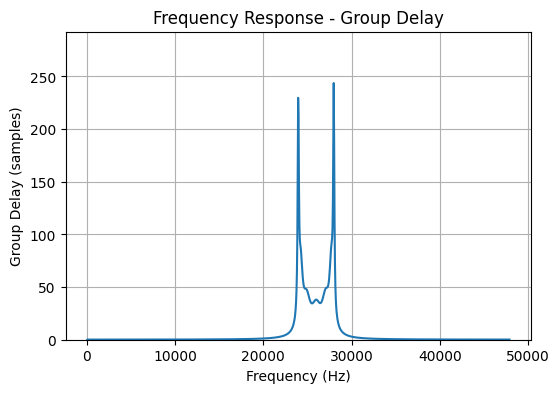

In [ ]:
# Mengatur penanganan peringatan ketika terjadi pembagian dengan nol atau nilai yang tidak valid
with np.errstate(divide='ignore', invalid='ignore'):
    # Memplot respons frekuensi filter dalam bentuk delay kelompok (group delay)
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Grafik diatas adalah plot respons frekuensi terhadap group delay untuk sebuah sistem atau komponen elektronik. Grafik ini digunakan untuk menunjukkan bagaimana delay grup (waktu yang diperlukan untuk suatu sinyal untuk melewati suatu sistem) bervariasi terhadap frekuensi sinyal.

**Penjelasan Grafik:**
- **Sumbu X**: Mewakili frekuensi sinyal dalam Hertz (Hz). Rentang yang ditampilkan adalah dari 0 Hz hingga 50.000 Hz.
- **Sumbu Y**: Mewakili group delay dinyatakan dalam sampel. Hal ini menunjukkan jumlah sampel yang diperlukan untuk sinyal melewati sistem pada frekuensi tertentu.
- **Kurva Biru**: Menunjukkan respons dari group delay terhadap frekuensi. Ada dua puncak tajam sekitar di tengah grafik, yang menunjukkan bahwa pada dua frekuensi tersebut ada kenaikan signifikan dalam group delay, artinya pada dua frekuensi ini terdapat delay lebih besar.

Dua puncak pada grafik menunjukkan frekuensi-frekuensi spesifik di mana terjadi resonansi atau kondisi tertentu yang menyebabkan delay grup meningkat secara drastis. Dalam konteks audio atau sinyal processing, kondisi ini bisa mengindikasikan adanya karakteristik filter tertentu yang perlu diperhatikan atau diatur ulang untuk mengoptimalkan kinerja sistem.
